<a href="https://colab.research.google.com/github/zivK12/Assignment2_pd_re/blob/main/Assignment2_pd_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment2
Ziv Kelmer

In [1]:
import numpy as np
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
path = '/content/drive/MyDrive/data/'
fname = 'matala2_cosmetics_2019-Nov.csv'
data = pd.read_csv(path+fname)

<ipython-input-14-c096103a7505>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path+fname)


New copy datetime DataFrame 


In [15]:
def copy_datetime(df):
    df_copy = df.copy()
    df_copy['event_time'] = df_copy['event_time'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S UTC'))
    return df_copy
df = copy_datetime(data)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


## Q1
Adding new column named 'duration_to_next_event'

In [16]:
def duration_to_next_event(df):
    df = df.sort_values(['user_id', 'user_session', 'event_time'])
    df['next_event_time'] = df.groupby(['user_id', 'user_session'])['event_time'].shift(-1)
    df['duration_to_next_event'] = (df['next_event_time'] - df['event_time']).dt.total_seconds()
    df['duration_to_next_event'] = df['duration_to_next_event'].fillna(0)
    df = df.drop('next_event_time', axis=1)
    return df

df = duration_to_next_event(df)


## check
df[df['user_session'] == '09fafd6c-6c99-46b1-834f-33527f4de241']


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
0,2019-11-01 00:00:02,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,23.0
6,2019-11-01 00:00:25,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,25.0
12,2019-11-01 00:00:50,view,5856190,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,7.0
15,2019-11-01 00:00:57,view,5674484,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,167.0
53,2019-11-01 00:03:44,cart,5674484,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,2.0
55,2019-11-01 00:03:46,view,5856190,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,8.0
56,2019-11-01 00:03:54,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,68.0
80,2019-11-01 00:05:02,view,5896424,1487580006300255120,NaN,jessnail,32.54,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0.0


## Q2
Adding new column named 'funnel_number'

In [17]:
def funnel_number(df):
    df = df.sort_values(['user_id', 'event_time'])
    df['time_diff'] = df.groupby('user_id')['event_time'].diff()
    df['time_diff'] = df['time_diff'].apply(lambda x: x.days)
    df['new_panel'] = (df['time_diff'] > 5) | (df['time_diff'].isnull())
    df['funnel_number'] = df.groupby('user_id')['new_panel'].cumsum()    
    df = df.drop(['time_diff', 'new_panel'], axis=1)
    
    return df

df = funnel_number(df)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1
2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1
2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1
2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1
2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1


## Q3
Adding new column named 'index_in_funnel' 

In [18]:
def funnel_index(df):
    df['index_in_funnel'] = df.groupby(['user_id', 'funnel_number'])['user_session'].transform(lambda x: pd.factorize(x)[0] + 1)
    return df
df =funnel_index(df)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,3


## Q4
Converting values in price column using regular expression

In [19]:
def re_price(price):
    if isinstance(price, str):
        match = re.search(r'\d+\.?\d*', price)
        if match:
            return float(match.group())
    elif isinstance(price, float):
        return price
    return None

df['price'] = df['price'].apply(re_price)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,3


##Q5
Visual explanation describing the number of events of each type

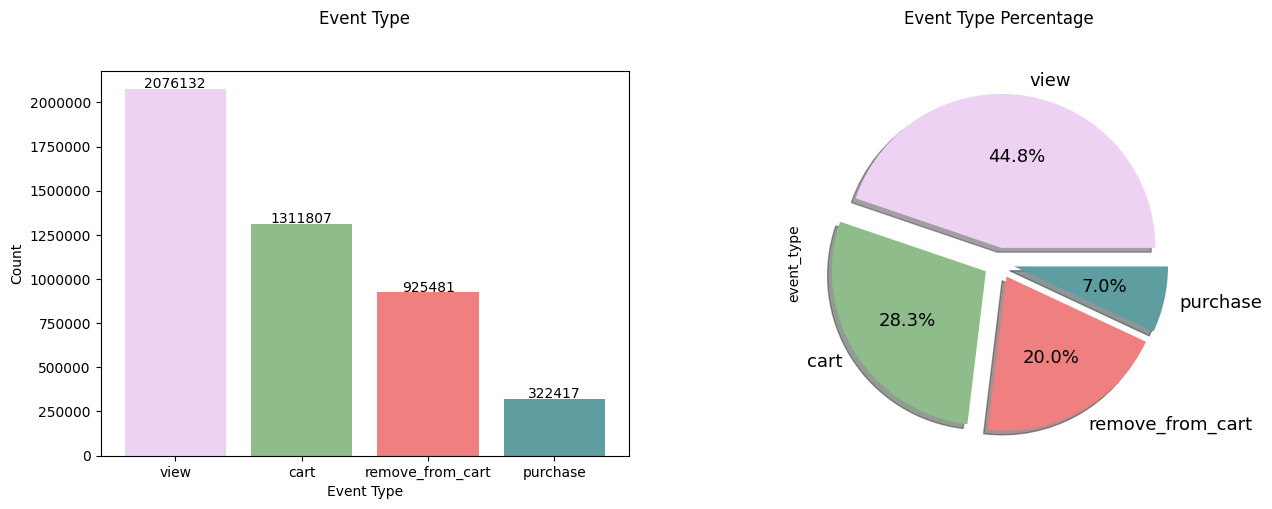

In [20]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(df['event_type'].value_counts().index, df['event_type'].value_counts().values, color=['#EDD2F4','#8FBC8B','#F08080','#5F9EA0'])
ax1.set_title('Event Type',y=1.1)
ax1.set_xlabel('Event Type')
ax1.set_ylabel('Count')
for i, v in enumerate(df['event_type'].value_counts().values):
    ax1.text(i, v + 5000, str(v), ha='center')
ax1.ticklabel_format(style='plain', axis='y')

df['event_type'].value_counts().plot.pie(autopct='%1.1f%%',colors =('#EDD2F4','#8FBC8B','#F08080','#5F9EA0'),textprops={'fontsize': 13},explode=(0.1,0.1,0.1,0.1),shadow=True, ax=ax2,labeldistance=1.1)
ax2.set_title('Event Type Percentage',y=1.1)



plt.show()


## Q6
An overall summary for each session

In [21]:
def session_sum_up(df):
    grouped = df.groupby(['user_session'])

    aggregations = {
        'duration_to_next_event': 'sum',
        'event_type': lambda x: list(x),
        'user_id': 'first',
        'funnel_number': 'first',
        'index_in_funnel': 'first',
        'product_id': lambda x: list(x),
        'category_code': lambda x: len(x),
        'product_id': lambda x: list(x)
    }

    session_summary = grouped.agg(aggregations).reset_index()
    session_summary = session_summary.rename(columns={'category_code': 'num_events'})
    session_summary = session_summary.rename(columns={'duration_to_next_event': 'session_duration'})

    session_summary['list_of_viewed'] = session_summary.apply(lambda x: [i for i, j in zip(x['product_id'], x['event_type']) if j == 'view'], axis=1)
    session_summary['list_of_added_to_cart'] = session_summary.apply(lambda x: [i for i, j in zip(x['product_id'], x['event_type']) if j == 'cart'], axis=1)
    session_summary['list_of_purchased'] = session_summary.apply(lambda x: [i for i, j in zip(x['product_id'], x['event_type']) if j == 'purchase'], axis=1)

    session_summary = session_summary.drop(['product_id', 'event_type'], axis=1)
    
    return session_summary
  
session_data  = session_sum_up(df)
session_data .head()

,user_session,session_duration,user_id,funnel_number,index_in_funnel,num_events,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,0.0,556321594,1,1,1,[5829298],[],[]
1,00001bc6-1e04-4861-be5d-1bc73929c21a,0.0,570103701,1,2,1,[5771614],[],[]
2,00001e77-5db8-4e96-ab7a-022ed3caf8b3,0.0,571677620,1,1,1,[5568472],[],[]
3,00004c7d-9507-474e-a559-0fdaccaaa390,0.0,504468592,2,6,1,[5864850],[],[]
4,0000597b-de39-4a77-9fe5-02c8792ca14e,151.0,571211128,1,2,3,"[5861620, 5861619, 5861591]",[],[]
